In [22]:
using Distributions,PyCall,SymPy,Plots,PyPlot,StatPlots, MultiPoly

In [23]:
@pyimport numpy as np;
@pyimport numpy.random as npr;
@pyimport matplotlib.mlab as mlab;
#plt = PyPlot #oy;
default(palette=:viridis)

In [152]:
npr.seed(42)                    #generating a random bigaussian distro for multiparticl
σq = 1
σp = 1
N = 1000000
mean, cov = [0,0], [(σq^2, 0), (0,σp^2)]
bGau = npr.multivariate_normal(mean, cov, N)
qₓ,pₓ = bGau[:,1], bGau[:,2];

In [154]:
qₓ₂,pₓ₂ = zeros(bGau[:,1]), zeros(bGau[:,2]); #refresh
for i =1:length(pₓ)
    e_factq = erf(qₓ[i]/(sqrt(2)*σq))
    rhoq = sqrt(2)*exp(-qₓ[i]^2/(2*σq^2))/(2*sqrt(pi)*σq)      
    pₓ₂[i] = -exp(psms*2*qₓ[i]*rhoq/e_factq)*qₓ[i]*σp/σq
    #pₓ₂[i] = exp(-lambertw(abs(2*qₓ[i]*rhoq)))*qₓ[i]*σp/σq        
end

for i =1:length(qₓ)    
    e_factp = erf(pₓ[i]/(sqrt(2)*σp))
    rhop = sqrt(2)*exp(-pₓ[i]^2/(2*σp^2))/(2*sqrt(pi)*σp)       
    qₓ₂[i] = exp(psms*2*pₓ[i]*rhop/e_factp)*pₓ[i]*σq/σp
    
end


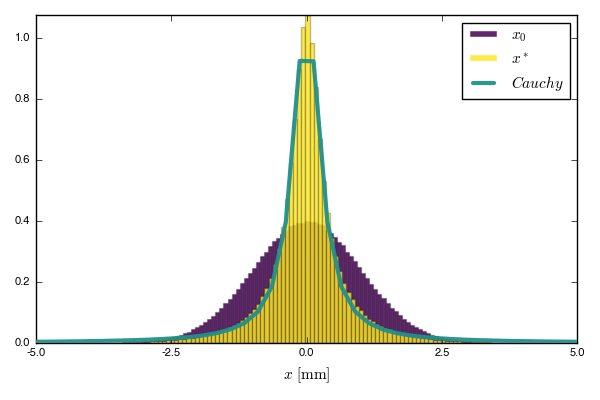

In [167]:
xpr = 5;
bns = 125
Plots.histogram(qₓ,alpha=0.85,bins=bns,line=0.25,norm=true,label=L"x_0")
histogram!(qₓ₂,alpha=.85,bins=bns,line=0.25,norm=true,label=L"x^*")

x = linspace(-5,5,40)
cau = Cauchy(0,.25)
x_star = fit(Cauchy,qₓ₂)
y = pdf(x_star,x)
Plots.plot!(x,y,line=3,label=L"Cauchy",alpha=0.95)

plot!(xlim=(-xpr,xpr),grid=false)
plot!(margin=15px,top_margin=15px,
legendfont=Plots.font("Helvetica",11),xlabel = L"x \ \rm{[mm]}")

## Custom Fit Function:
### From https://github.com/JuliaStats/Distributions.jl/blob/master/src/univariate/continuous/cauchy.jl

```julia
# Note: this is not a Maximum Likelihood estimator
function fit{T<:Real}(::Type{Cauchy}, x::AbstractArray{T})
    l, m, u = quantile(x, [0.25, 0.5, 0.75])
    Cauchy(m, (u - l) / 2)
end
```